### Information processing primitives for the Joglekar & Wang rate model

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/IPP_WANG")

In [80]:
import numpy as np
import xarray as xr
from src.infodyn.conn_pid import conn_pid
from frites.conn import conn_te
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
rates = xr.load_dataarray("../data/protocol0.nc")[..., ::30]

#### Firing rate average over trials

##### Fixation

In [4]:
rates_avg_f = rates.sel(trials=0).mean("trials")

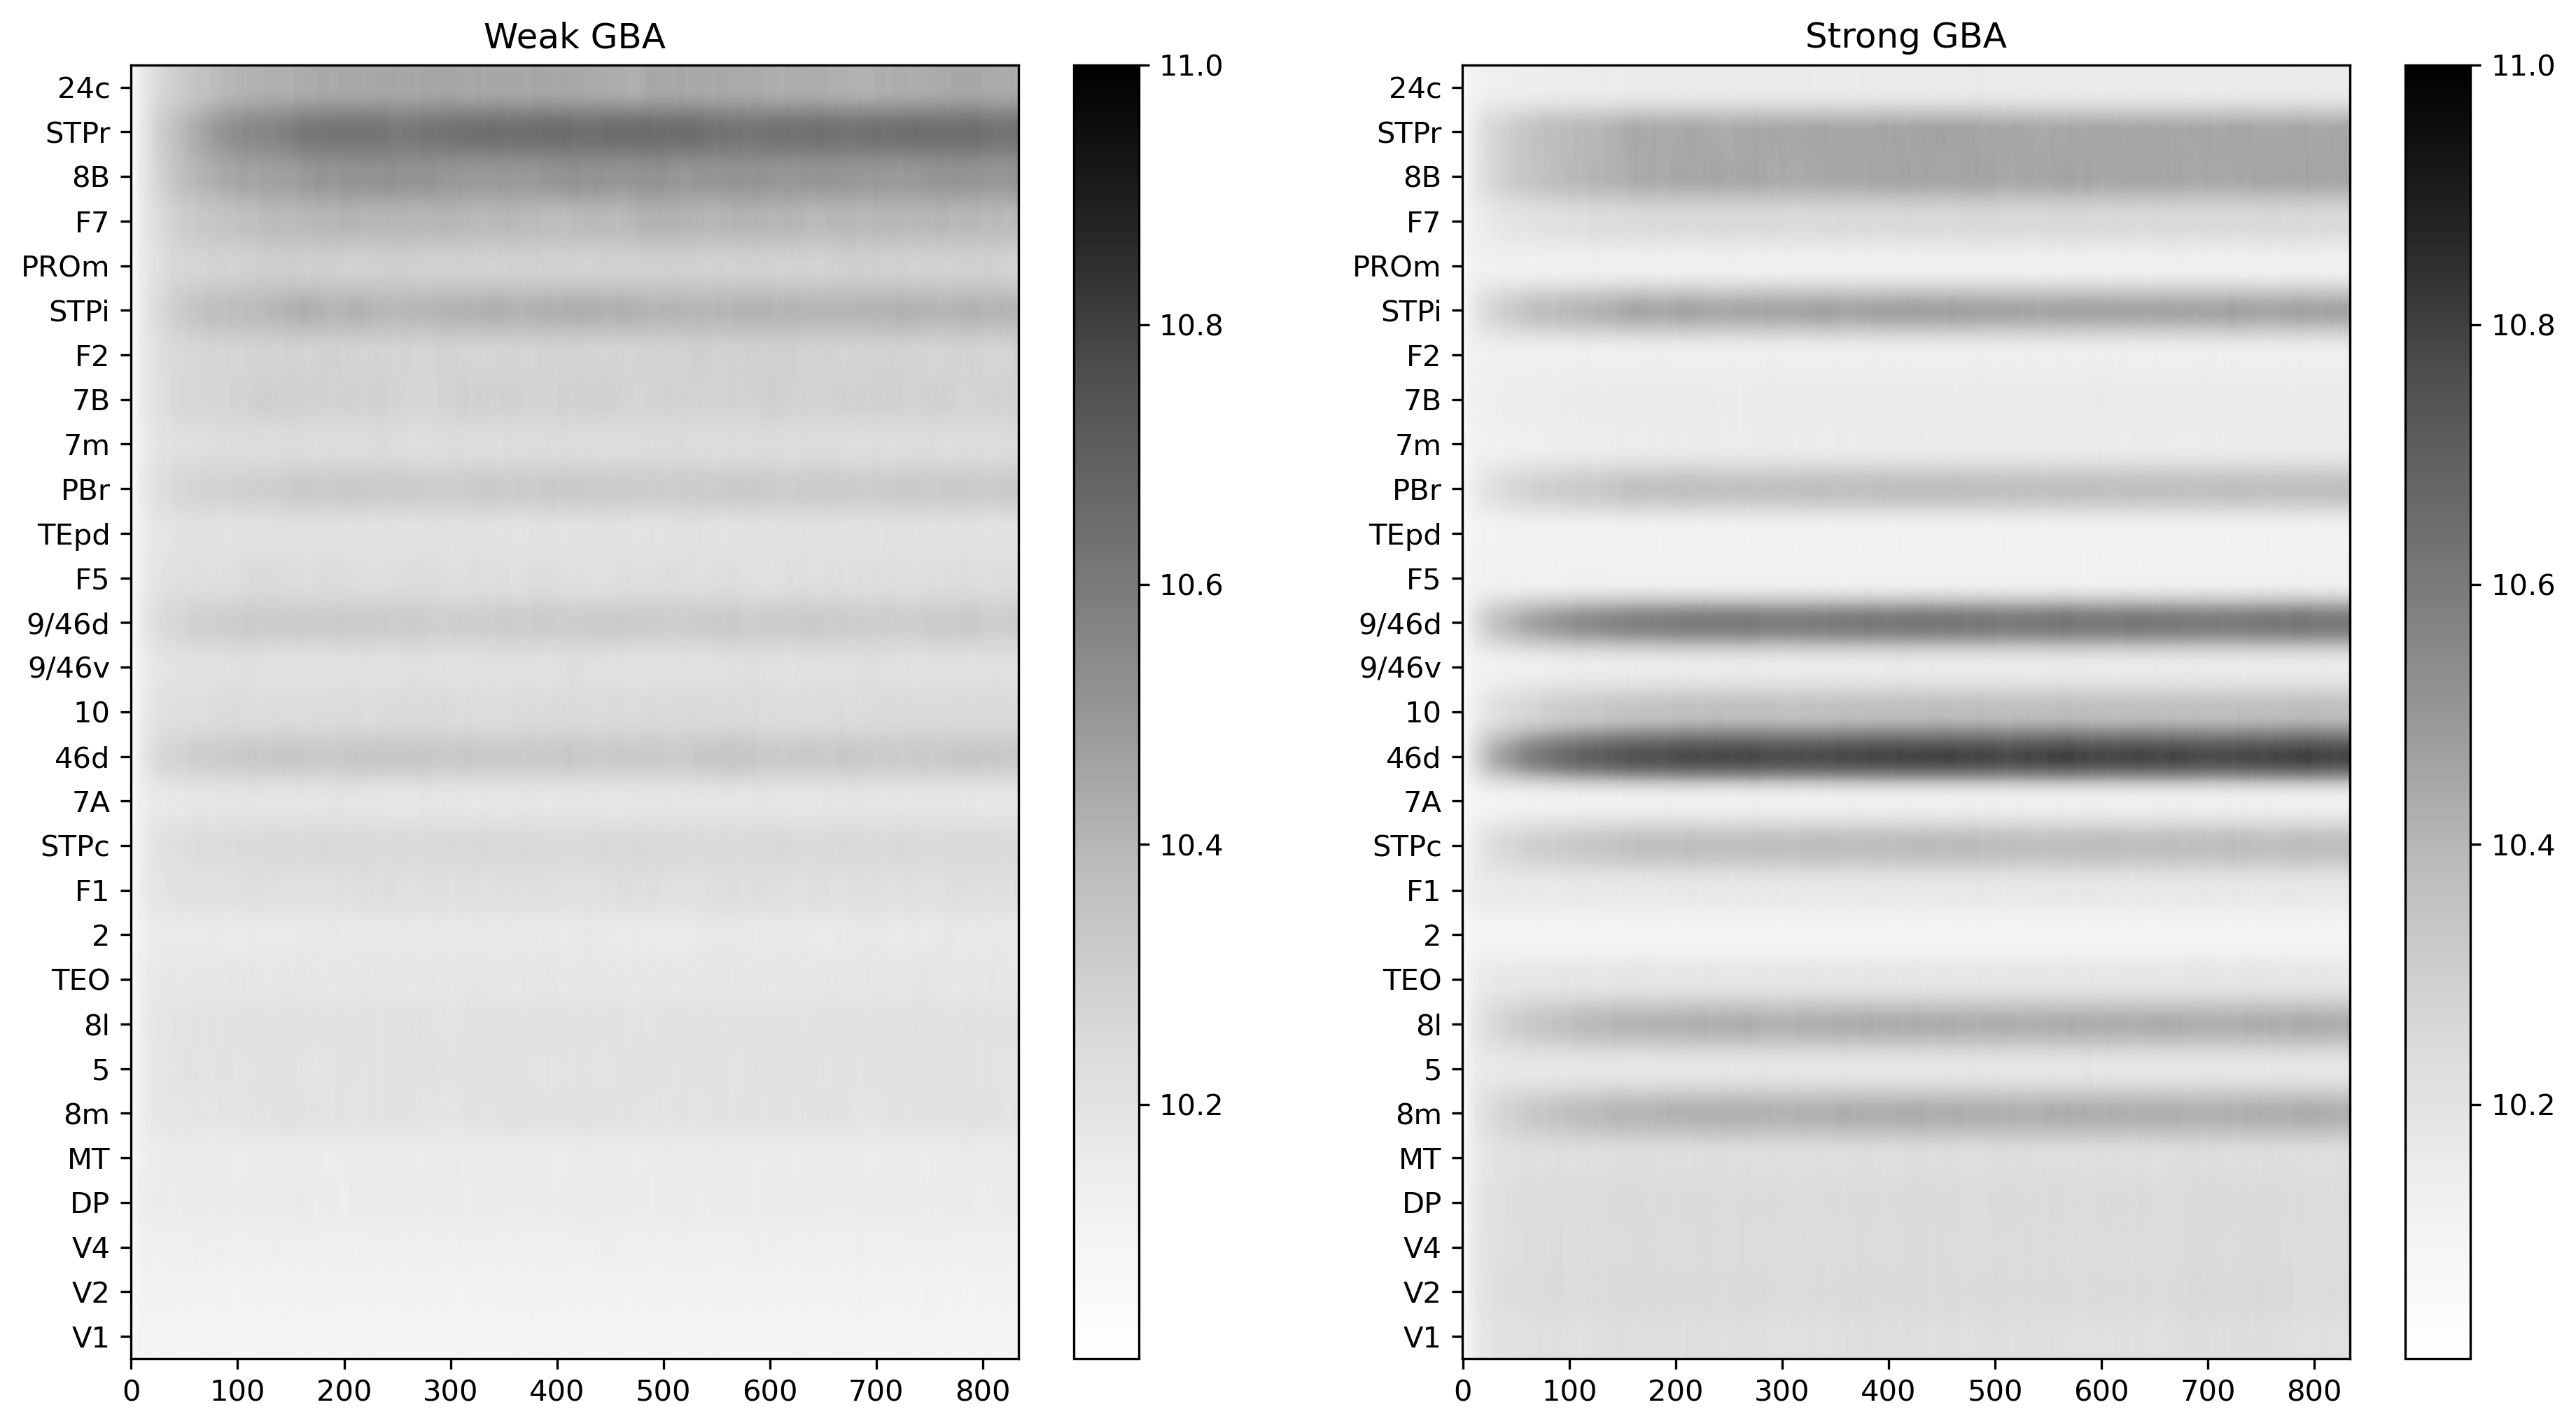

In [5]:
plt.figure(figsize=(15, 8), dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(rates_avg_f.sel(gba="weak"), aspect="auto", origin="lower", cmap="Greys", vmax=11)
plt.yticks(range(rates_avg_f.sizes["roi"]), rates_avg_f.roi.data)
plt.title("Weak GBA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(rates_avg_f.sel(gba="strong"), aspect="auto", origin="lower", cmap="Greys", vmax=11)
plt.yticks(range(rates_avg_f.sizes["roi"]), rates_avg_f.roi.data);
plt.title("Strong GBA")
plt.colorbar()

##### Task

In [6]:
rates_avg_t = rates.sel(trials=1).mean("trials")

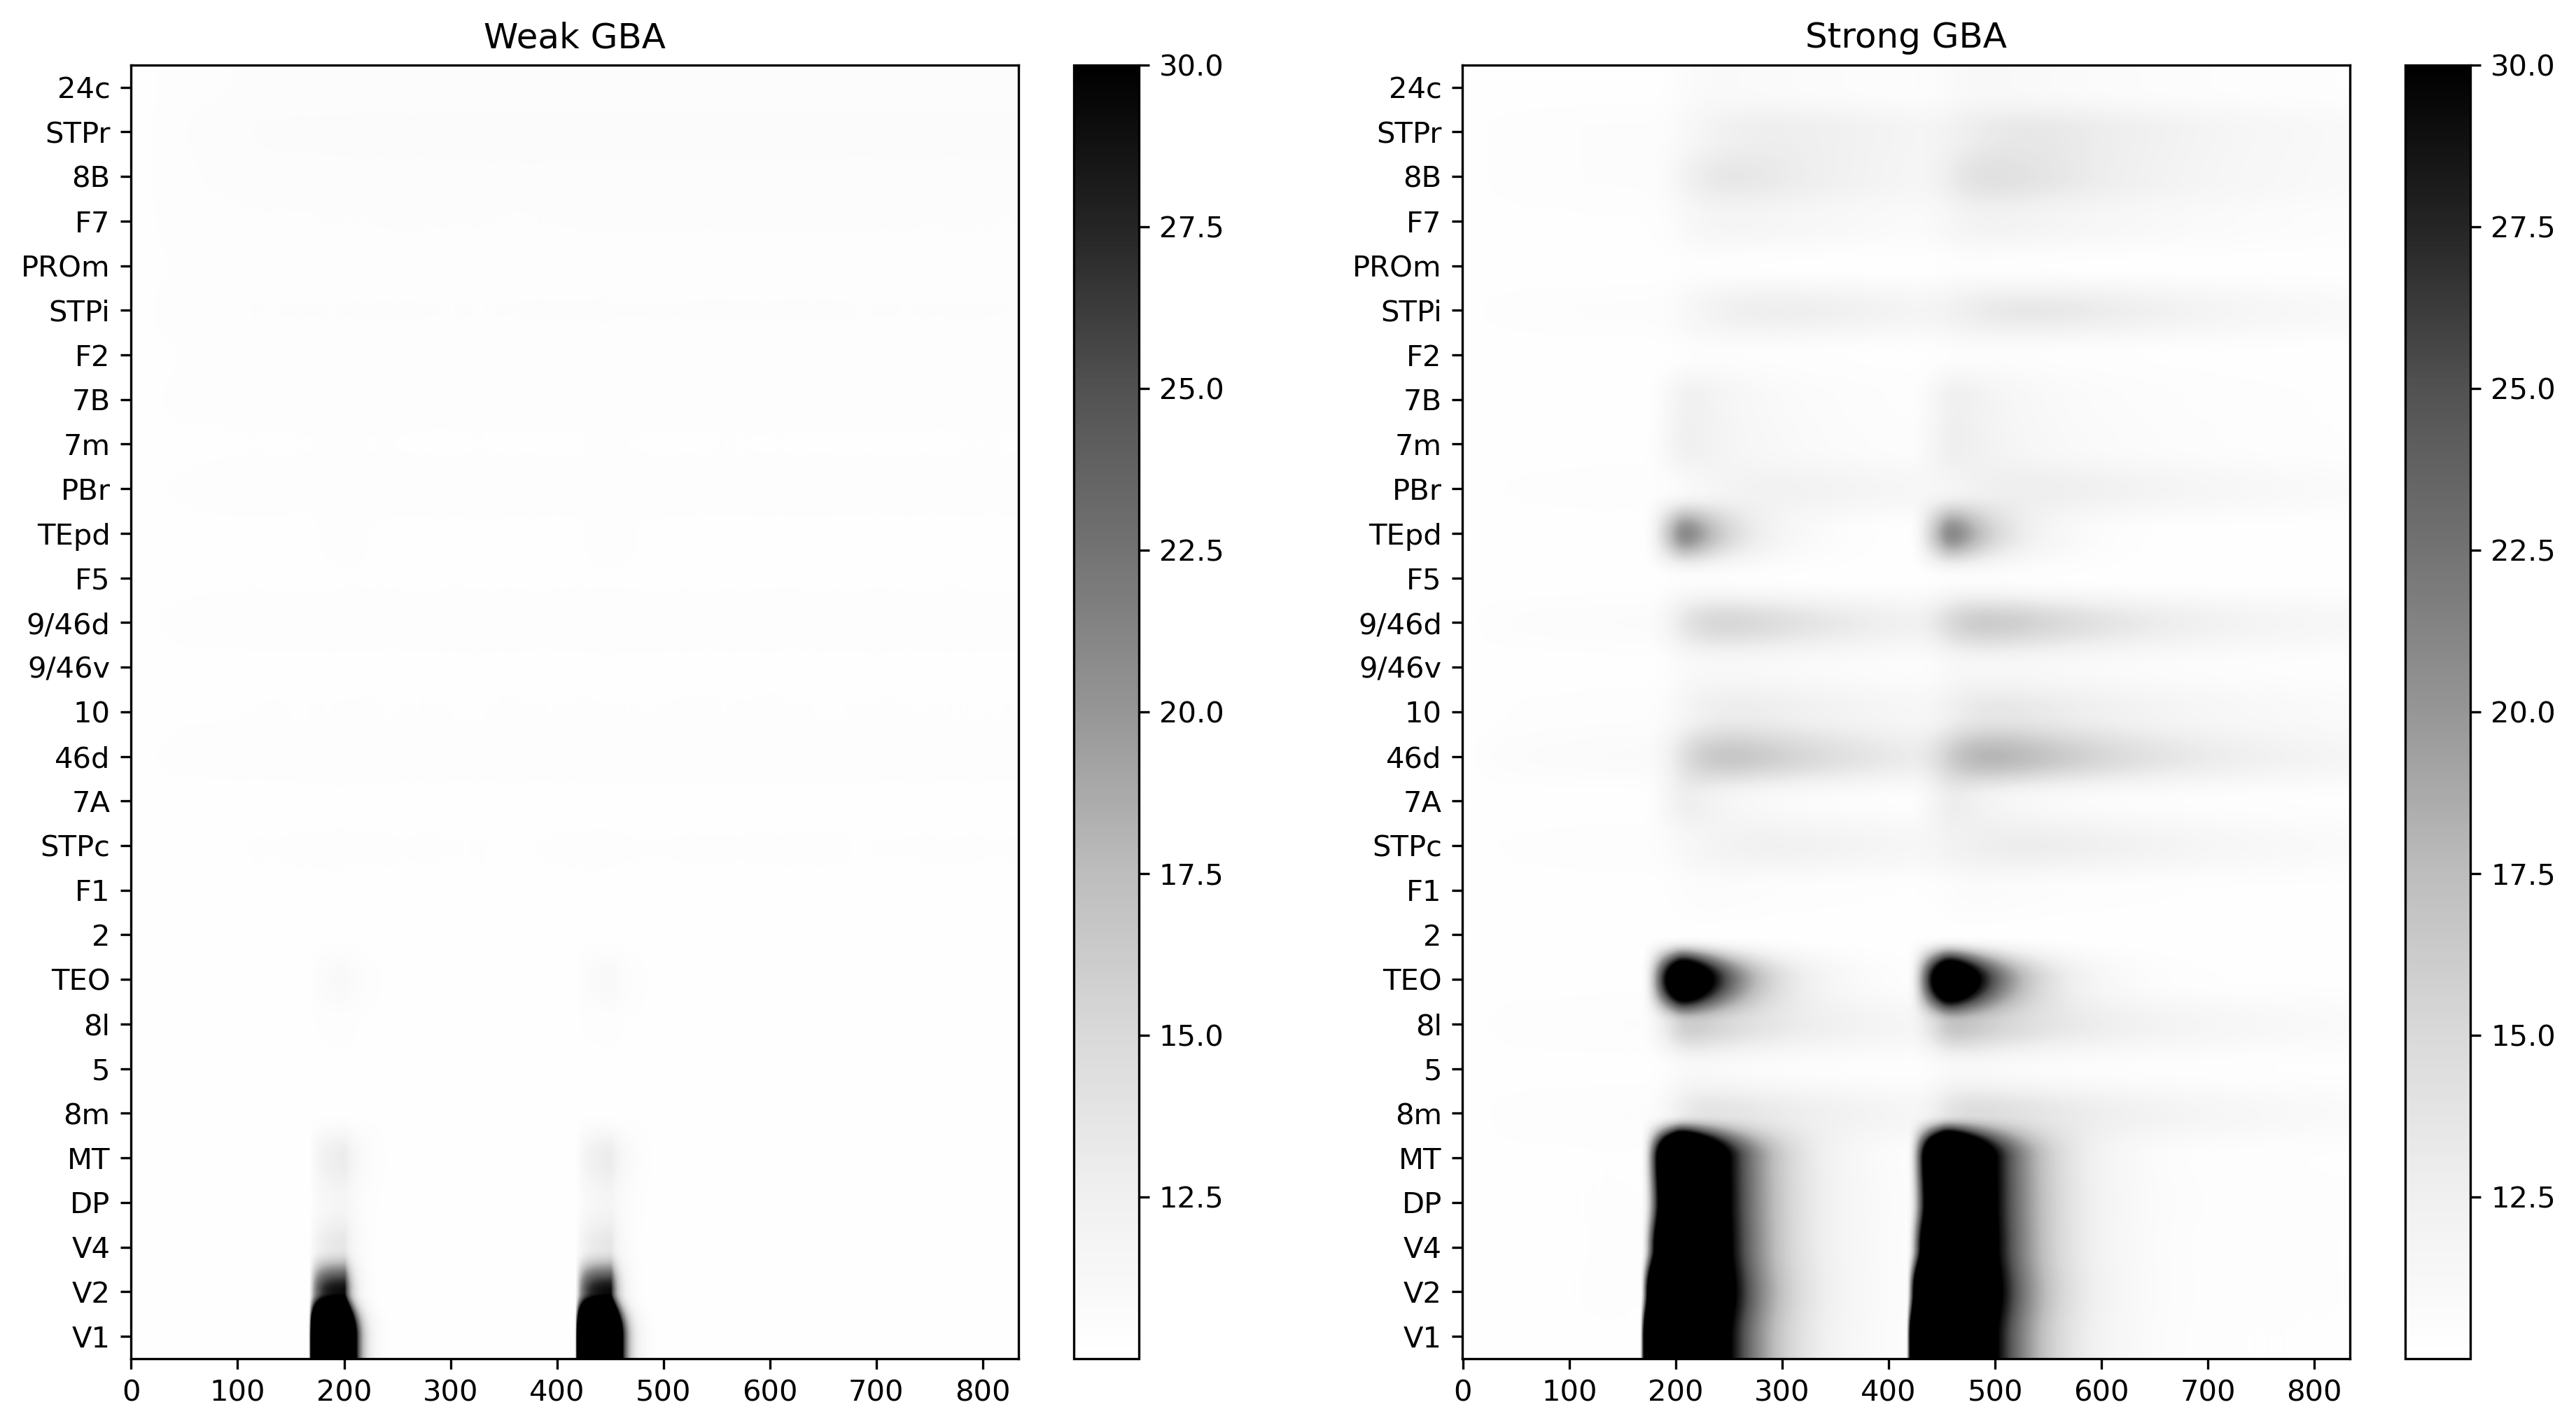

In [7]:
plt.figure(figsize=(15, 8), dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(rates_avg_t.sel(gba="weak"), aspect="auto", origin="lower", cmap="Greys", vmax=30)
plt.yticks(range(rates_avg_t.sizes["roi"]), rates_avg_t.roi.data)
plt.title("Weak GBA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(rates_avg_t.sel(gba="strong"), aspect="auto", origin="lower", cmap="Greys", vmax=30)
plt.yticks(range(rates_avg_t.sizes["roi"]), rates_avg_t.roi.data);
plt.title("Strong GBA")
plt.colorbar()

#### Partial Information Decomposition

In [24]:
pid_weak = conn_pid(rates.sel(gba="weak"), "trials", "roi", "times", "cd")

Defining links (n_roi=29; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Compute PID on 406 connectivity pairs
    Apply the Gaussian Copula Rank Normalization
    Estimating PID in the network
100%|█| Estimating unique information and synergy : 464/464 [00:36<00:00,   12.65it/


In [25]:
pid_strong = conn_pid(rates.sel(gba="strong"), "trials", "roi", "times", "cd")

Defining links (n_roi=29; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Compute PID on 406 connectivity pairs
    Apply the Gaussian Copula Rank Normalization
    Estimating PID in the network
100%|█| Estimating unique information and synergy : 464/464 [00:37<00:00,   12.48it/


#### Mutual Information

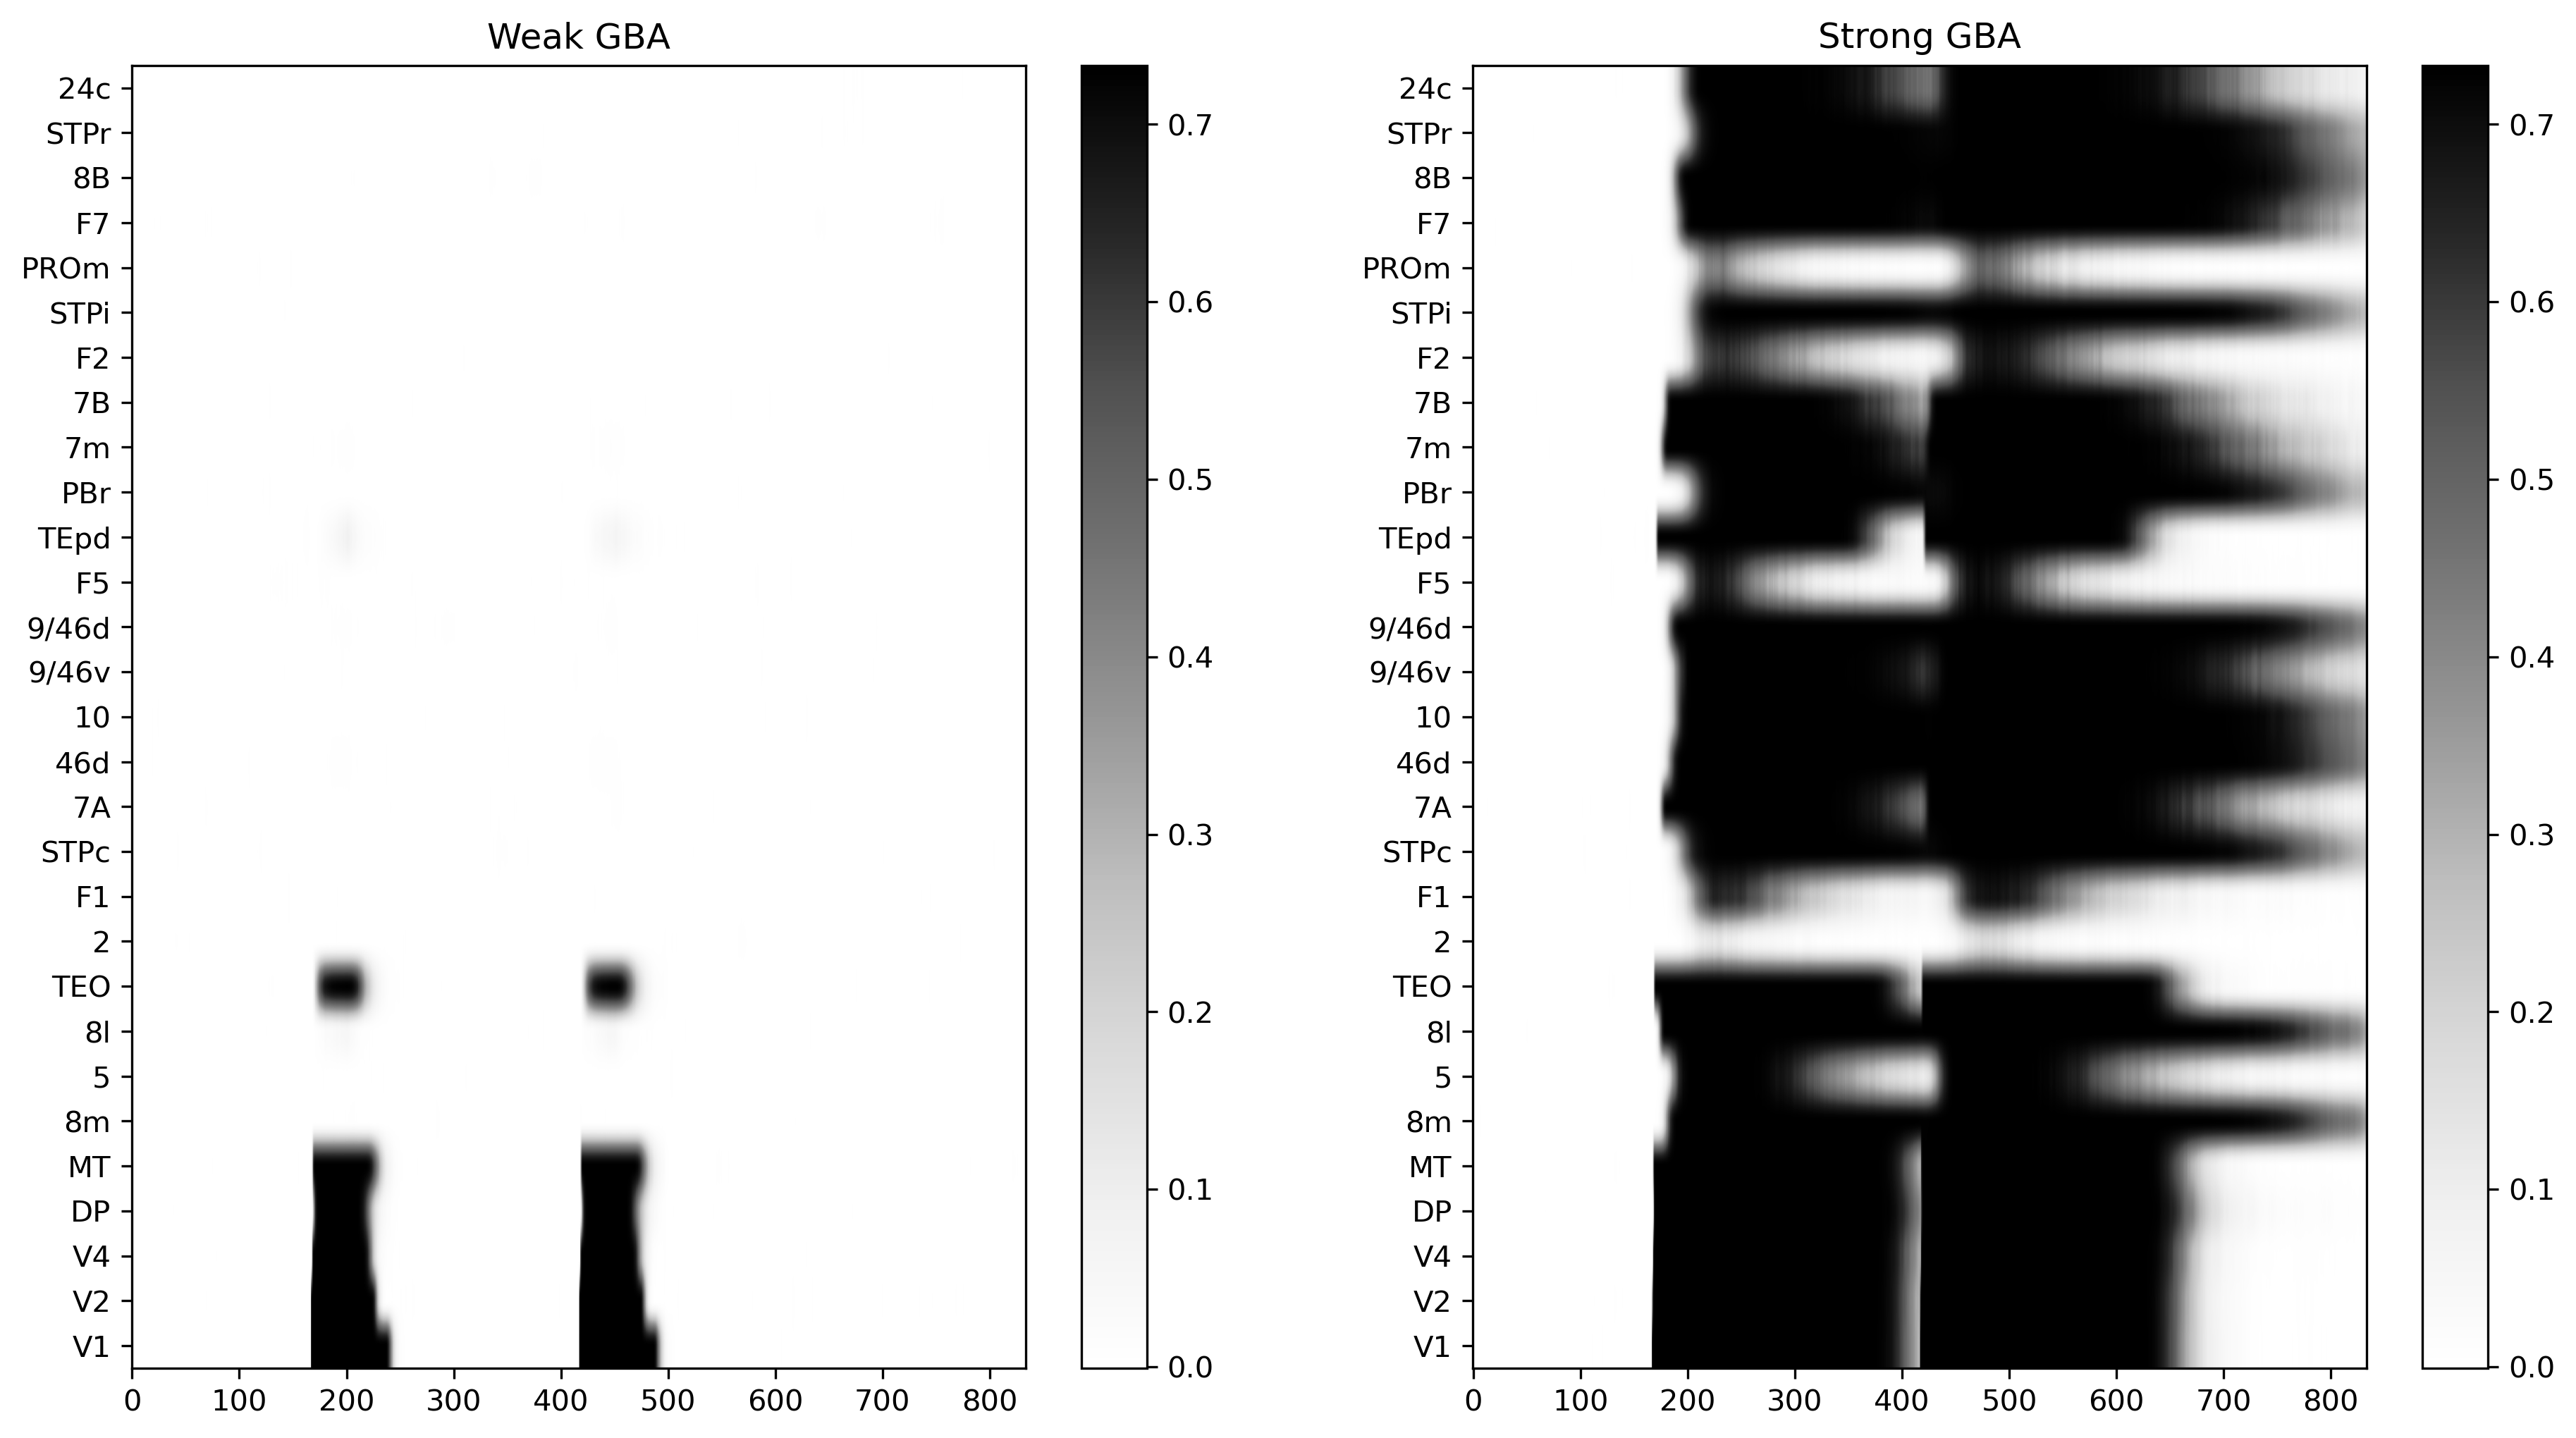

In [26]:
plt.figure(figsize=(15, 8), dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(pid_fix[0], aspect="auto", cmap="Greys", origin="lower")
plt.yticks(range(rates_avg_t.sizes["roi"]), rates_avg_t.roi.data)
plt.title("Weak GBA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(pid_task[0], aspect="auto", cmap="Greys", origin="lower")
plt.yticks(range(rates_avg_t.sizes["roi"]), rates_avg_t.roi.data);
plt.title("Strong GBA")
plt.colorbar()

#### Unique

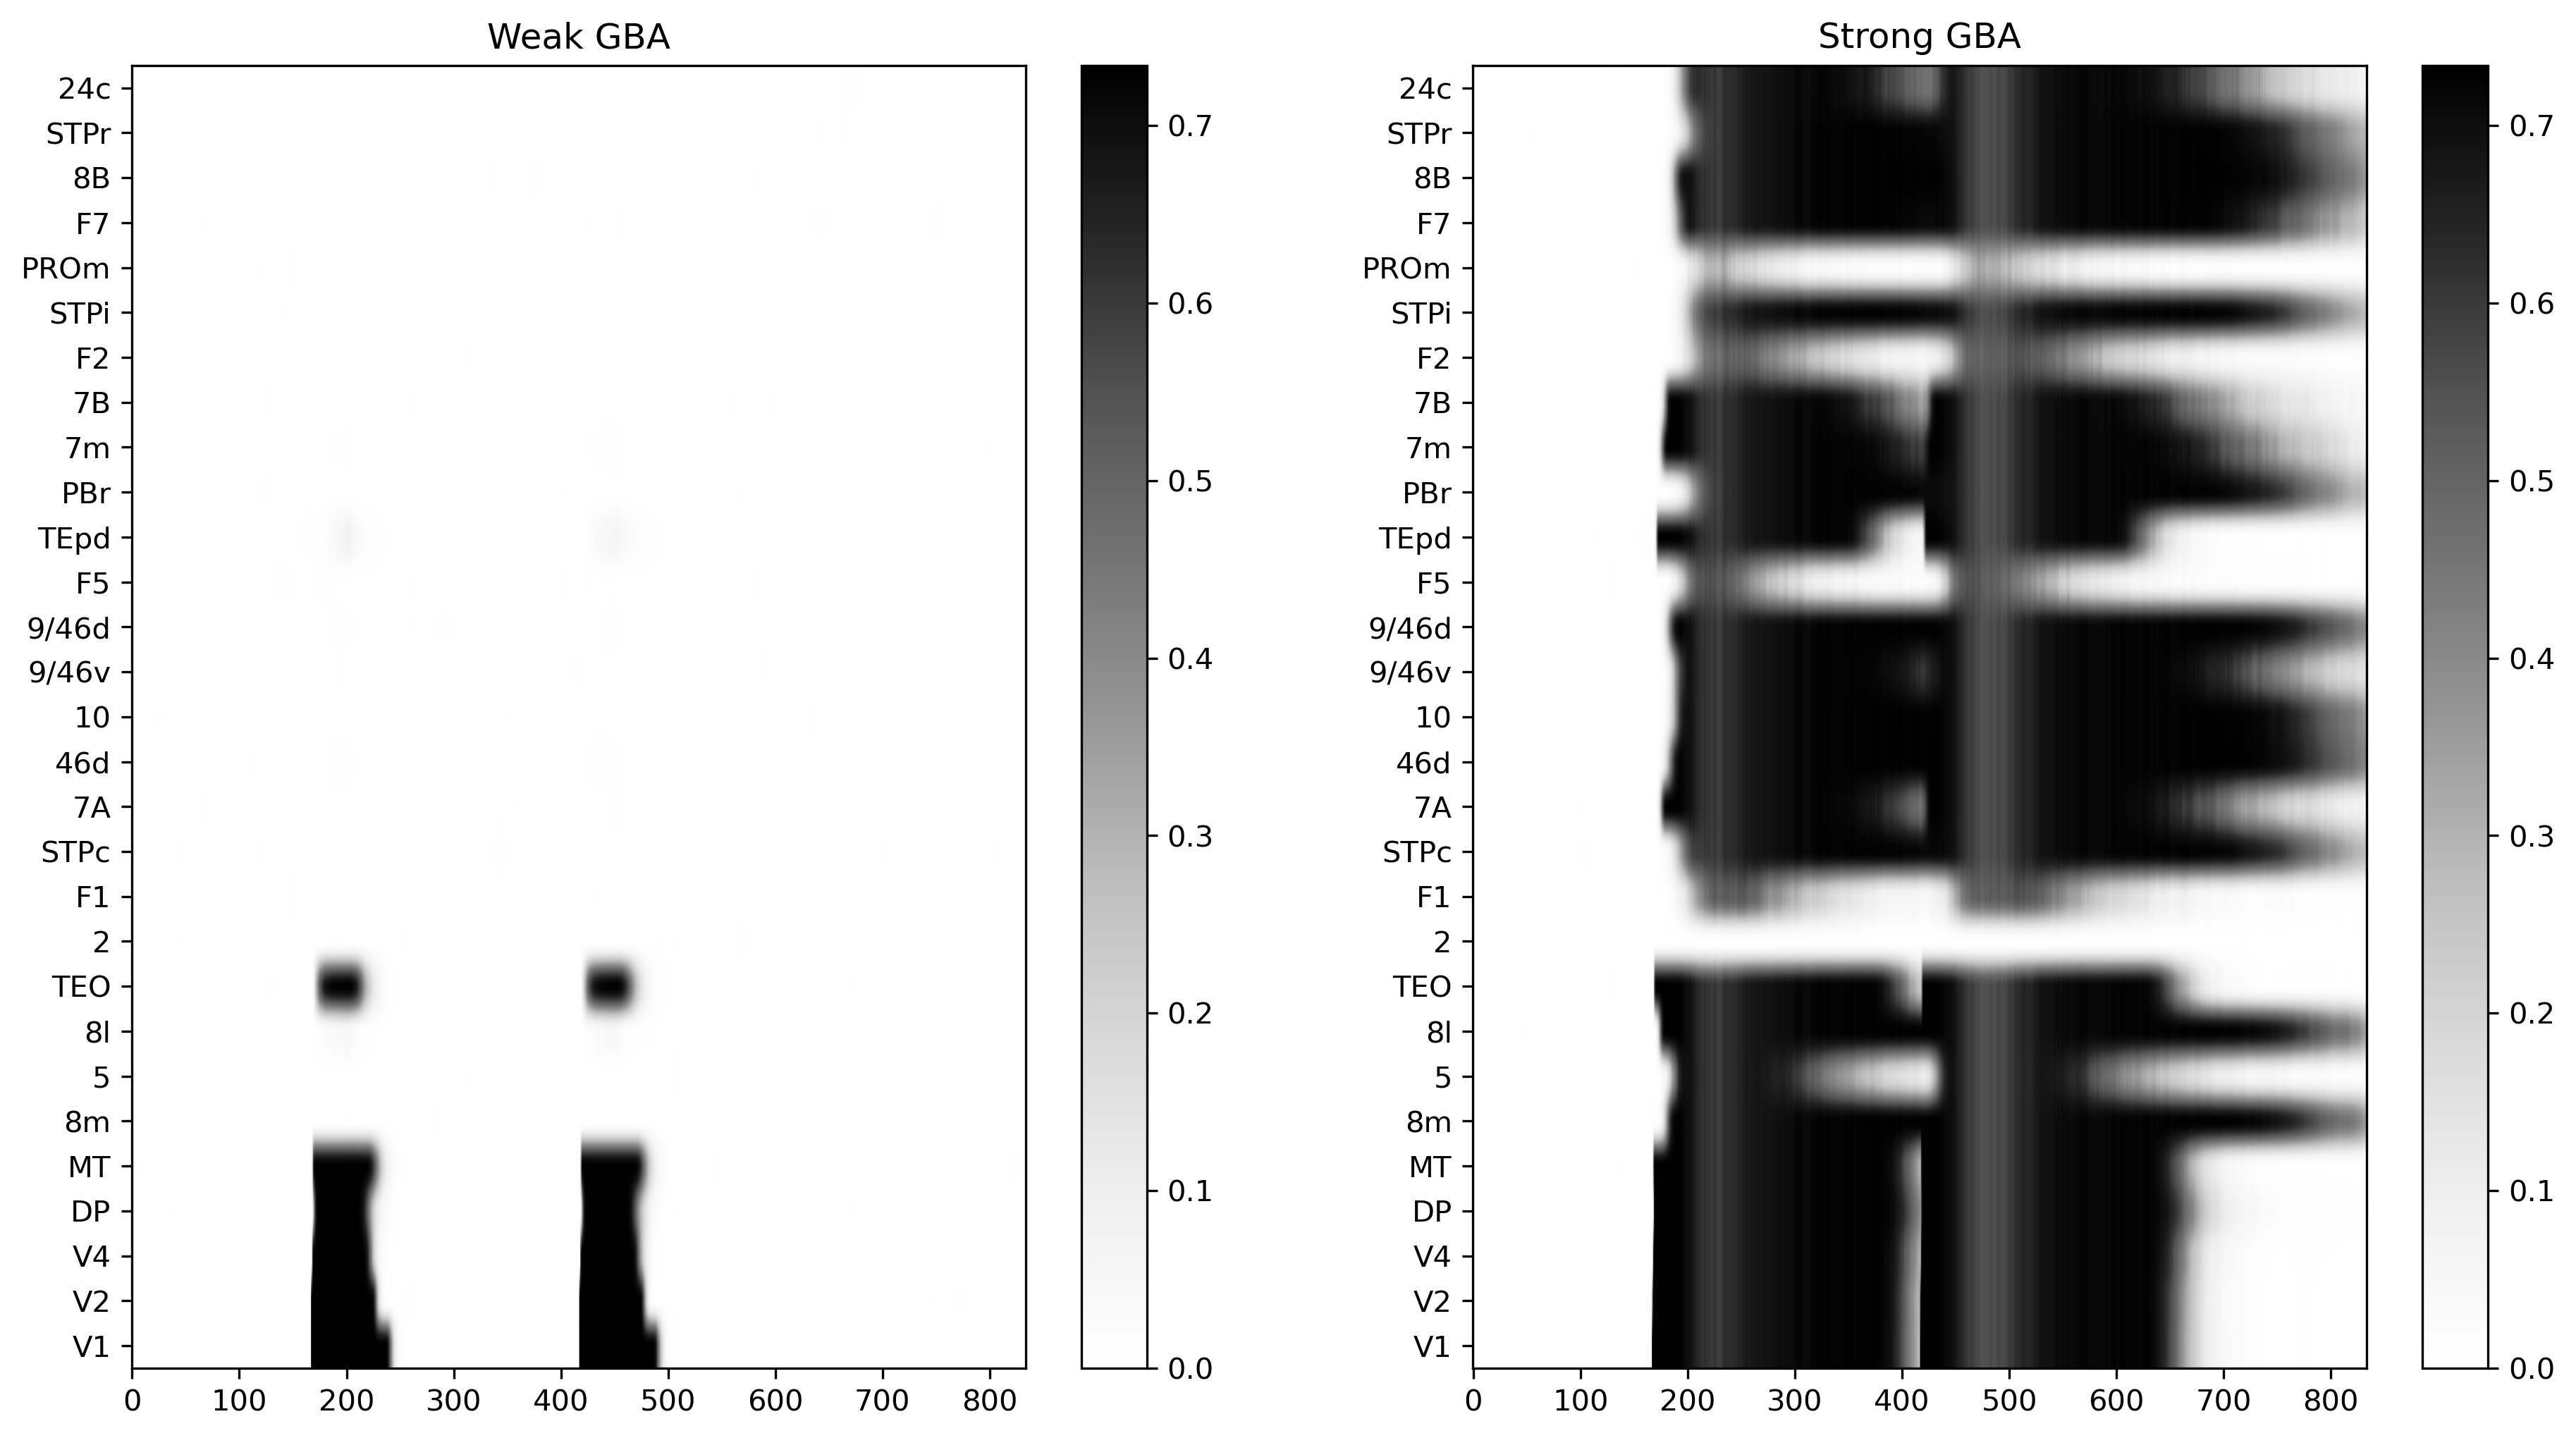

In [28]:
plt.figure(figsize=(15, 8), dpi=300)
plt.subplot(1, 2, 1)
plt.imshow(pid_fix[1], aspect="auto", cmap="Greys", origin="lower")
plt.yticks(range(rates_avg_t.sizes["roi"]), rates_avg_t.roi.data)
plt.title("Weak GBA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(pid_task[1], aspect="auto", cmap="Greys", origin="lower")
plt.yticks(range(rates_avg_t.sizes["roi"]), rates_avg_t.roi.data);
plt.title("Strong GBA")
plt.colorbar()

#### Total information, redundancy, sinergy

Text(0.5, 0, 'Synergy [bits]')

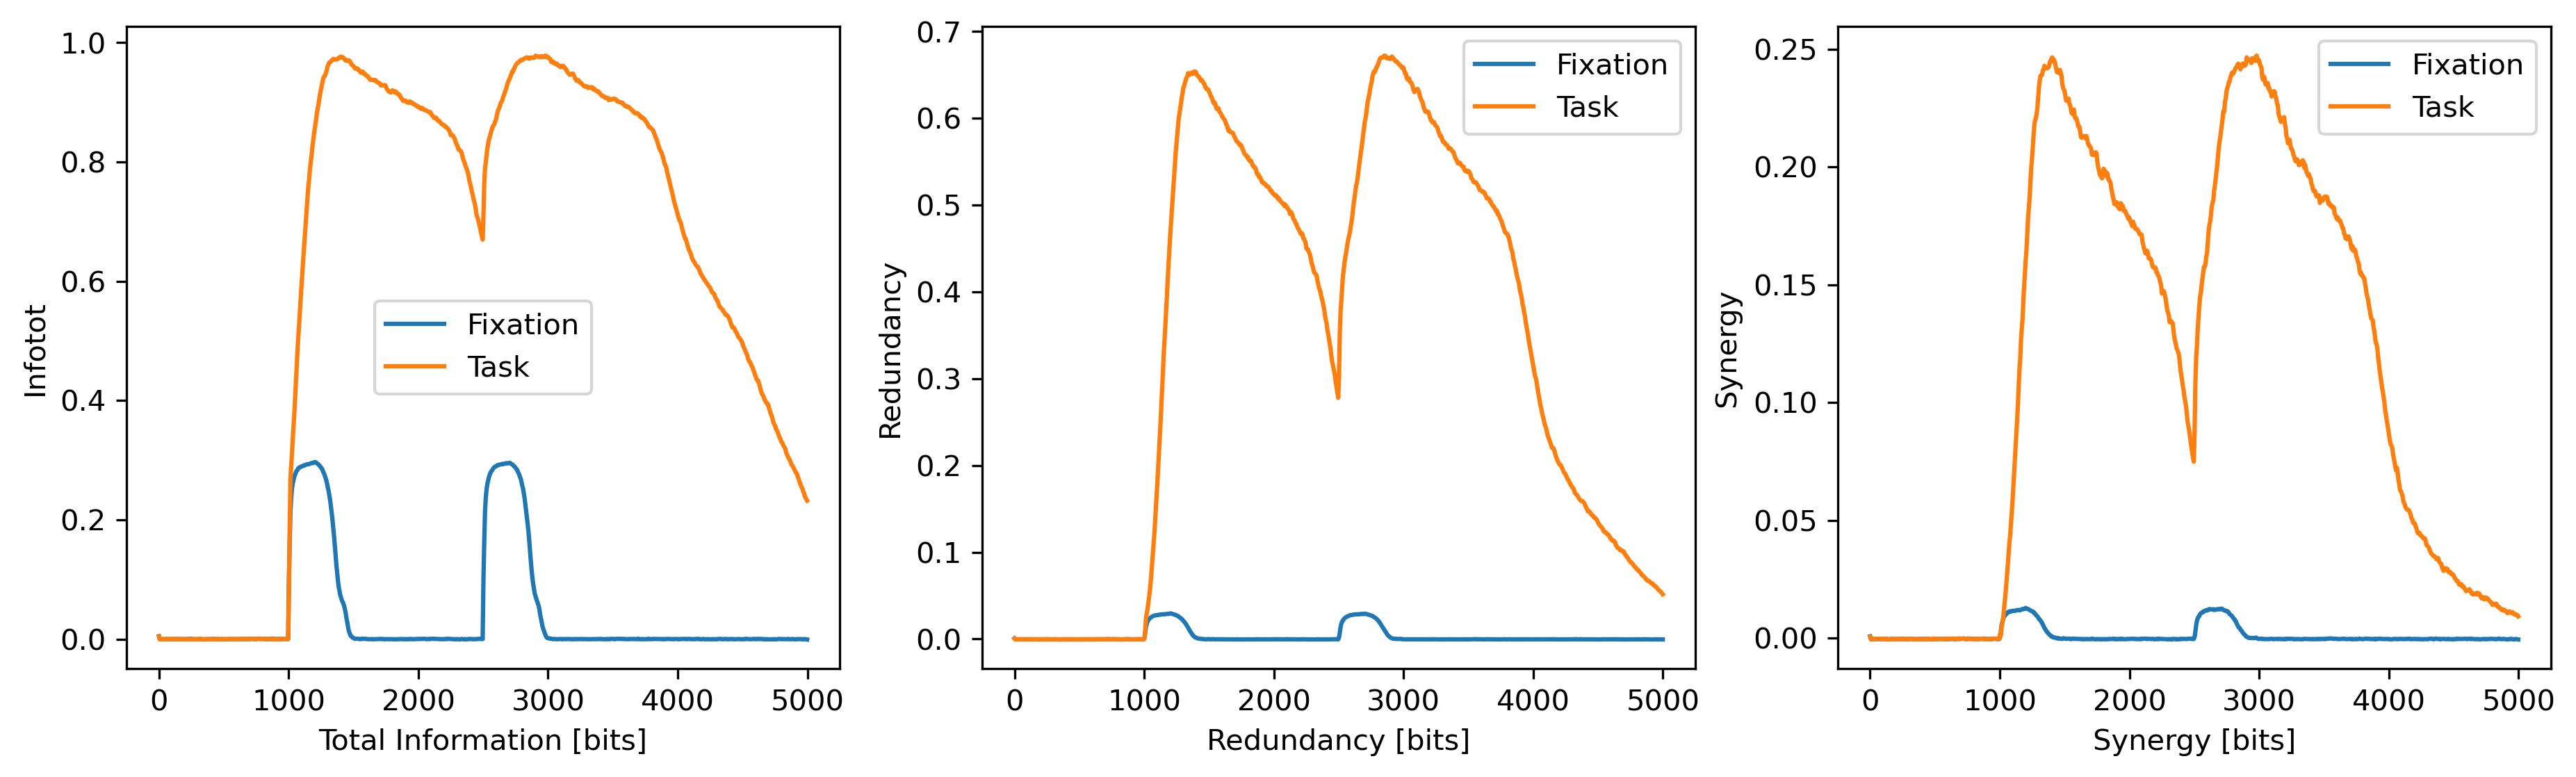

In [40]:
plt.figure(figsize=(15, 4), dpi=300)
plt.subplot(131)
pid_fix[2].mean("roi").plot()
pid_task[2].mean("roi").plot()
plt.legend(["Fixation", "Task"])
plt.xlabel("Time [a.u]")
plt.xlabel("Total Information [bits]")

plt.subplot(132)
pid_fix[3].mean("roi").plot()
pid_task[3].mean("roi").plot()
plt.legend(["Fixation", "Task"])
plt.xlabel("Time [a.u]")
plt.xlabel("Redundancy [bits]")

plt.subplot(133)
pid_fix[4].mean("roi").plot()
pid_task[4].mean("roi").plot()
plt.legend(["Fixation", "Task"])
plt.xlabel("Time [a.u]")
plt.xlabel("Synergy [bits]")

#### Transfer entropy

In [49]:
pairs_to = np.stack(([0] * 28, range(1, 29)), axis=1)
pairs_from = pairs[:, [1,0]]

In [51]:
TE_forward = []

for gba in ["weak", "strong"]:
    TE_forward += [conn_te(rates.sel(trials=1, gba=gba), times='times', roi='roi', n_jobs=20, max_delay=40, pairs=pairs_to)]
TE_forward = xr.concat(TE_forward, "gba")

Defining links (n_roi=29; directed=True; net=False, nb_min_links=None)
Compute Transfer Entropy (n_pairs=28, delays=[0:1:40])
100%|█████████████████████████████| Estimating TE : 28/28 [00:00<00:00,   42.93it/s]
Defining links (n_roi=29; directed=True; net=False, nb_min_links=None)
Compute Transfer Entropy (n_pairs=28, delays=[0:1:40])
100%|█████████████████████████████| Estimating TE : 28/28 [00:00<00:00, 5285.59it/s]


In [56]:
TE_feedback = []

for gba in ["weak", "strong"]:
    TE_feedback += [conn_te(rates.sel(trials=1, gba=gba), times='times', roi='roi', n_jobs=20, max_delay=40, pairs=pairs_from)]
TE_feedback = xr.concat(TE_feedback, "gba")

Defining links (n_roi=29; directed=True; net=False, nb_min_links=None)
Compute Transfer Entropy (n_pairs=28, delays=[0:1:40])
100%|████████████████████████████| Estimating TE : 28/28 [00:00<00:00, 22733.36it/s]
Defining links (n_roi=29; directed=True; net=False, nb_min_links=None)
Compute Transfer Entropy (n_pairs=28, delays=[0:1:40])
100%|████████████████████████████| Estimating TE : 28/28 [00:00<00:00, 32096.34it/s]


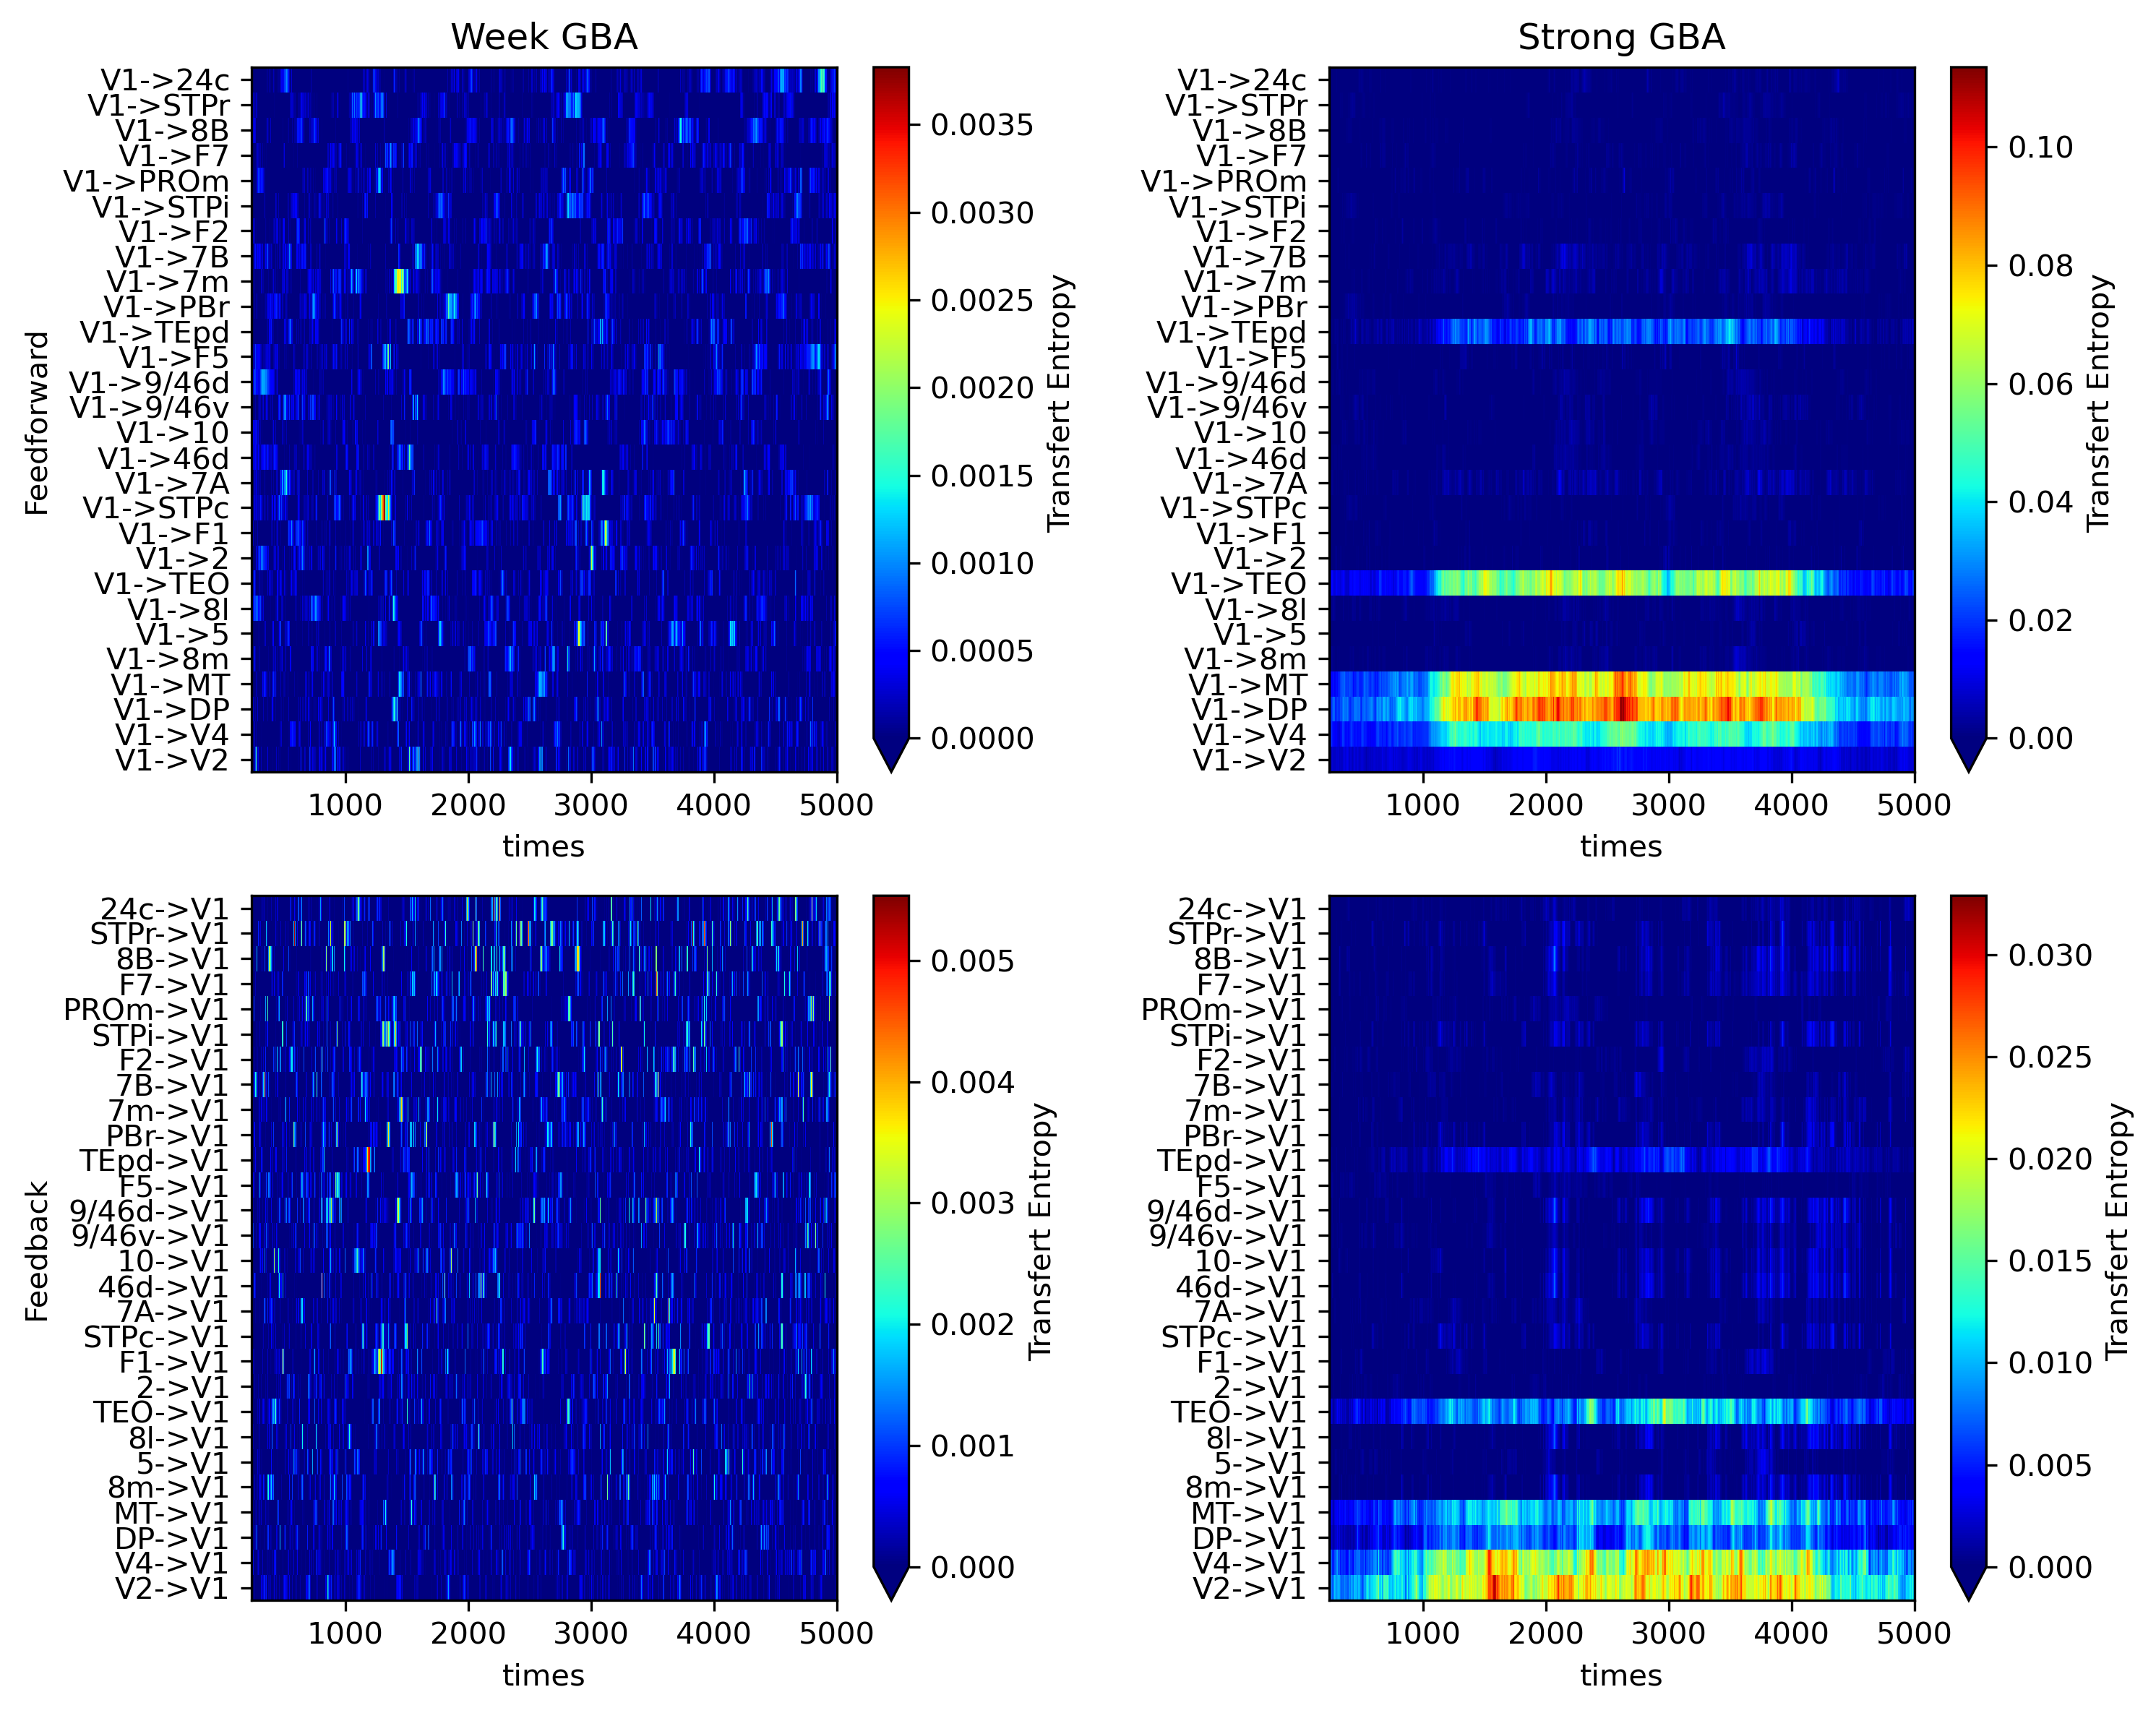

In [65]:
plt.figure(figsize=(10, 8), dpi=300)

plt.subplot(221)
TE_forward.isel(gba=0).plot.imshow(cmap="jet", vmin=0)
plt.title("Week GBA")
plt.ylabel("Feedforward")
plt.subplot(222)
TE_forward.isel(gba=1).plot.imshow(cmap="jet", vmin=0)
plt.title("Strong GBA")
plt.ylabel(" ")
plt.subplot(223)
TE_feedback.isel(gba=0).plot.imshow(cmap="jet", vmin=0)
plt.ylabel("Feedback")
plt.subplot(224)
TE_feedback.isel(gba=1).plot.imshow(cmap="jet", vmin=0)
plt.ylabel(" ")
plt.tight_layout()

#### Active information storage

In [66]:
from frites.core import gcmi_nd_cc

In [74]:
rois = rates.roi.data

In [82]:
AISw = []

for roi in tqdm(rois):
    AISw += [gcmi_nd_cc(rates.sel(gba="weak", roi=roi)[..., :-40].data, rates.sel(gba="weak", roi=roi)[..., 40:].data, traxis=0, mvaxis=None)]
    
AISw = xr.DataArray(AISw, dims=("roi", "times"), coords=(rois, rates.times[:-40]))

100%|███████████████████████████████████████████████| 29/29 [00:15<00:00,  1.92it/s]


In [83]:
AISs = []

for roi in tqdm(rois):
    AISs += [gcmi_nd_cc(rates.sel(gba="strong", roi=roi)[..., :-40].data, rates.sel(gba="strong", roi=roi)[..., 40:].data, traxis=0, mvaxis=None)]
    
AISs = xr.DataArray(AISs, dims=("roi", "times"), coords=(rois, rates.times[:-40]))

100%|███████████████████████████████████████████████| 29/29 [00:14<00:00,  2.03it/s]


In [84]:
AIS = xr.concat([AISw, AISs], "gba")

Text(0.5, 0, 'Time [a.u]')

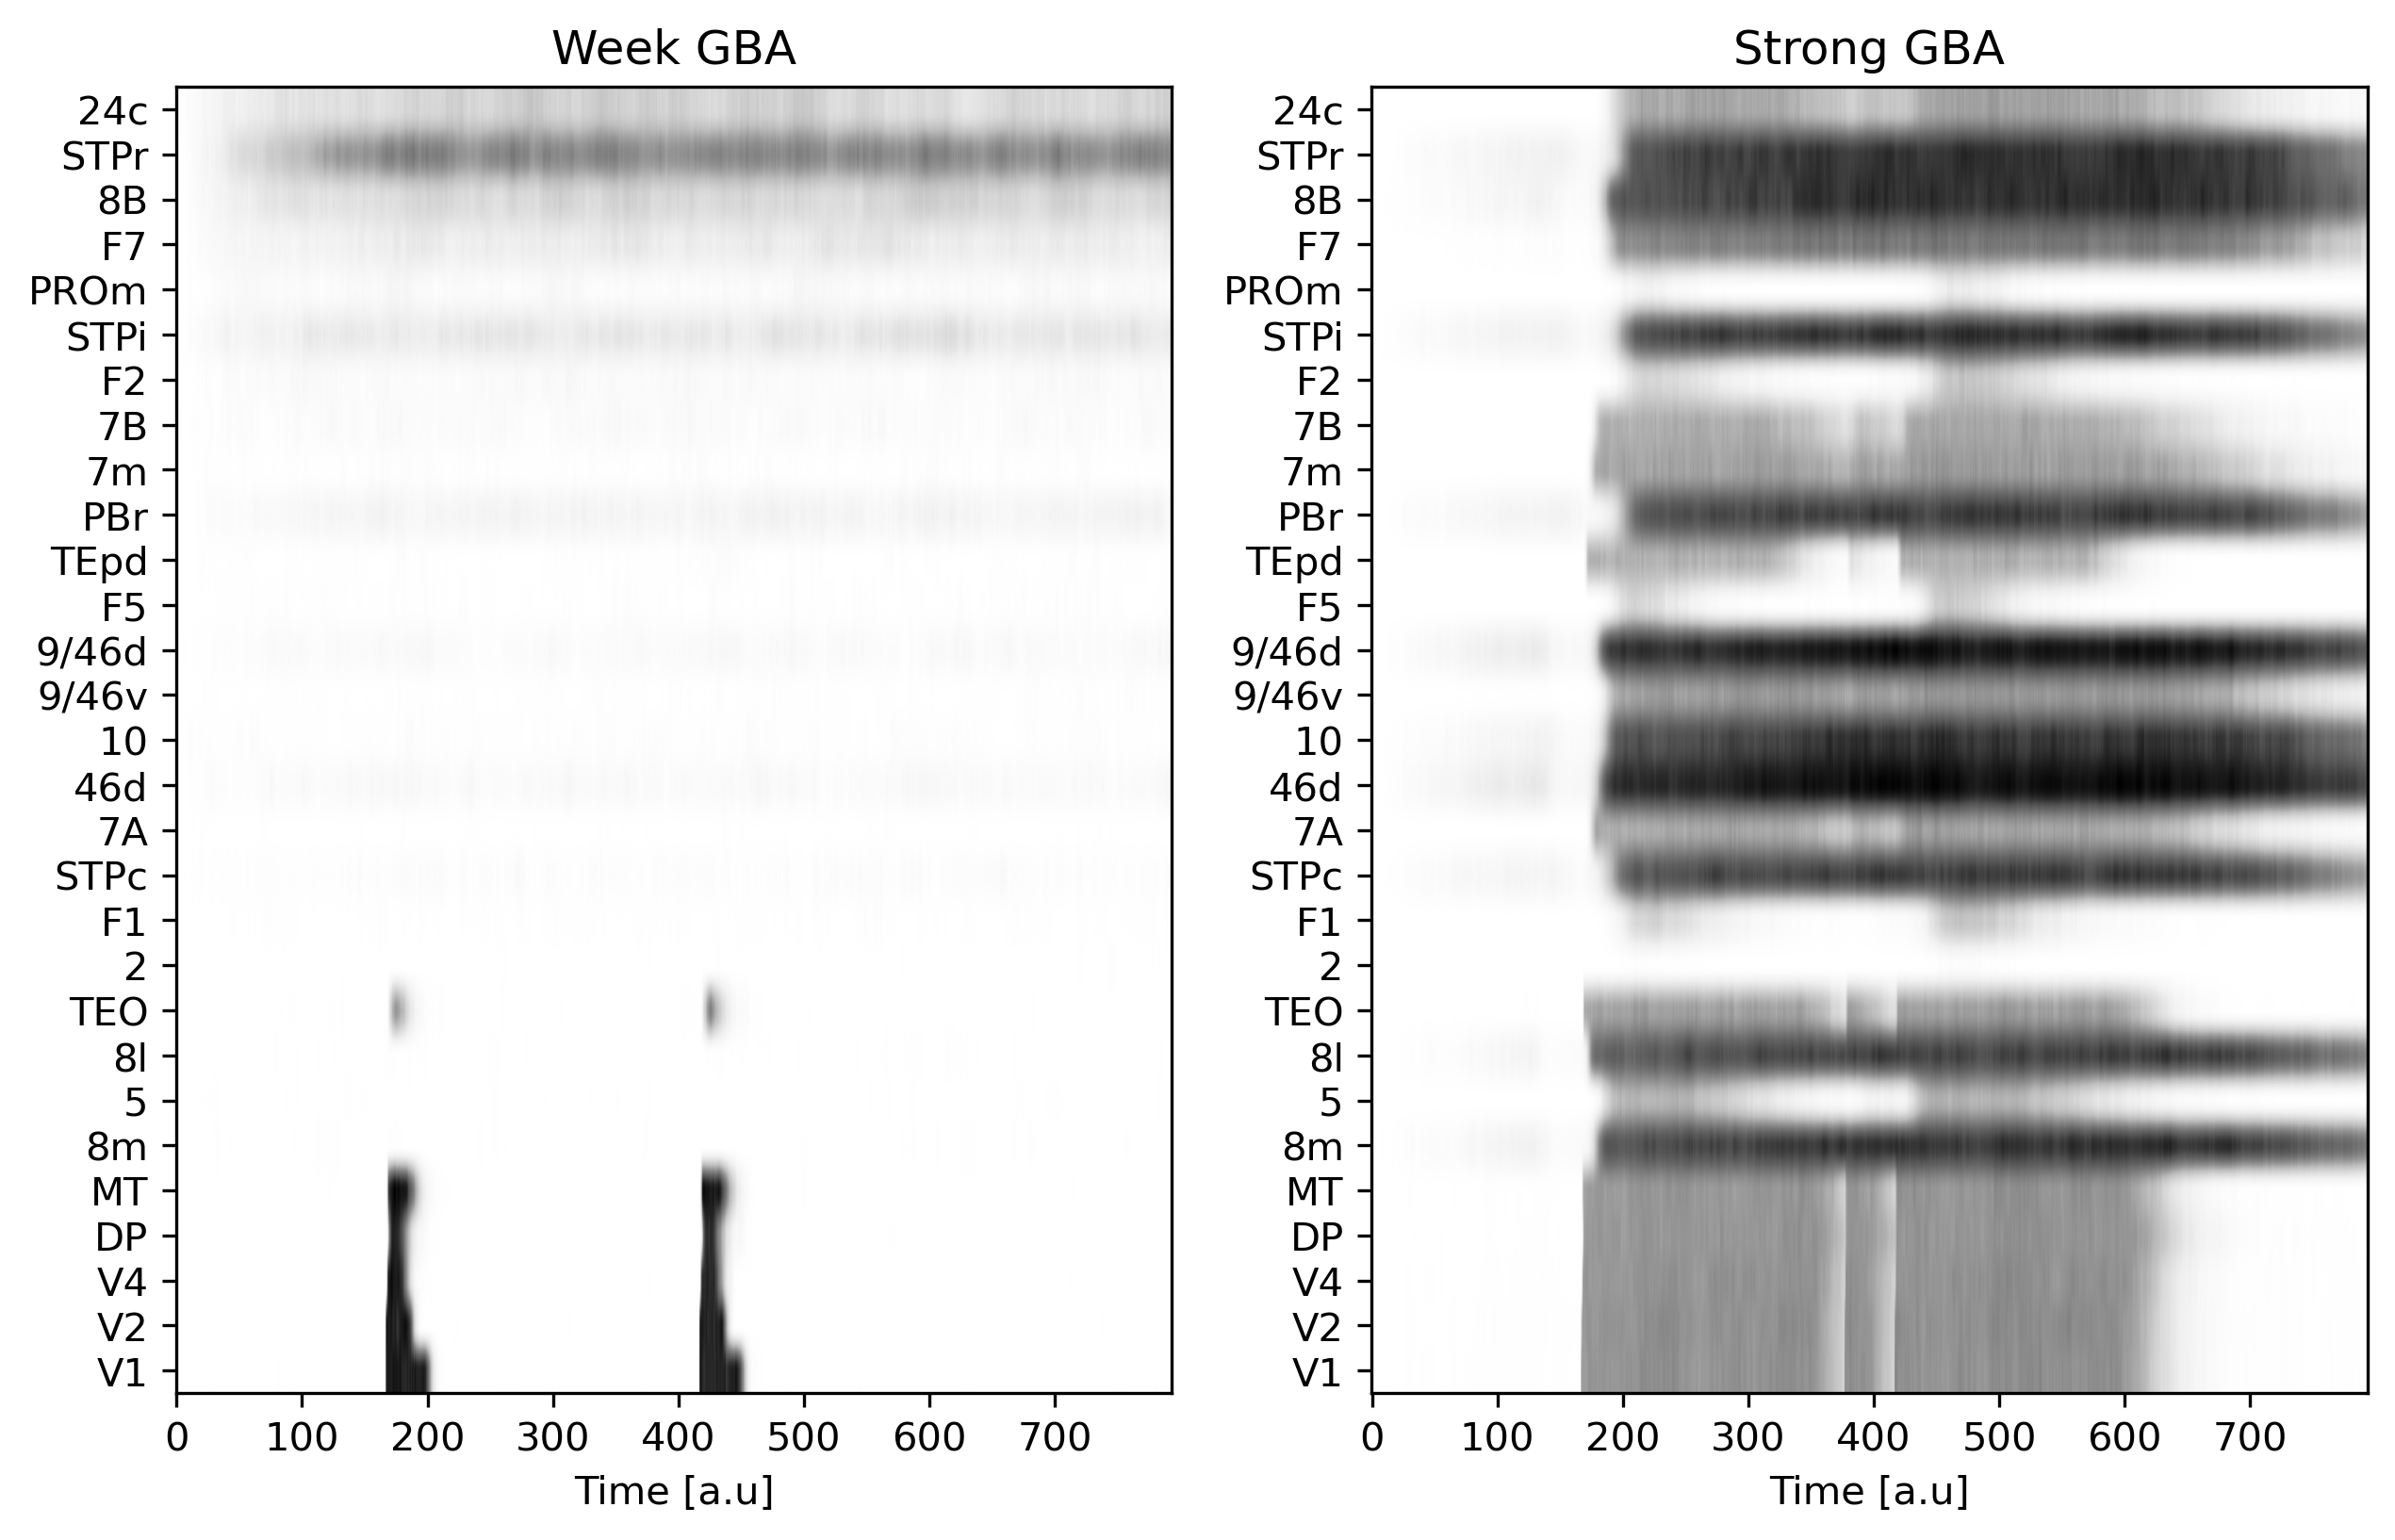

In [92]:
plt.figure(figsize=(10, 6), dpi=300)

plt.subplot(121)
plt.imshow(AIS.isel(gba=0), aspect="auto", cmap="Greys", origin="lower")
plt.title("Week GBA")
plt.xlabel("Time [a.u]")
plt.yticks(range(len(rois)), rois)
plt.subplot(122)
plt.imshow(AIS.isel(gba=1), aspect="auto", cmap="Greys", origin="lower")
plt.title("Strong GBA")
plt.yticks(range(len(rois)), rois)
plt.xlabel("Time [a.u]")